In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer
import matplotlib.pyplot as plt

# PM25: 24-h average

In [2]:
pm25=pd.read_excel('pm25_changes_tra.xlsx').rename({'Unnamed: 0':''},axis=1).set_index('')

In [3]:
pm25

,base_vals,x0_vals,x0_abs,x0_%,x0.25_vals,x0.25_abs,x0.25_%,x0.5_vals,x0.5_abs,x0.5_%,...,x1.25_%,x1.5_vals,x1.5_abs,x1.5_%,x1.75_vals,x1.75_abs,x1.75_%,x2_vals,x2_abs,x2_%
,,,,,,,,,,,,,,,,,,,,,
BASE,92.714272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRL,0.000000,91.689896,-1.024371,-1.143585,91.944870,-0.769394,-0.858752,92.200661,-0.513604,-0.573030,...,0.287674,93.230255,0.515995,0.575333,93.489227,0.774961,0.863835,93.747803,1.033543,1.152039
TRH,0.000000,89.931931,-2.782338,-3.124012,90.610794,-2.103472,-2.358618,91.302925,-1.411338,-1.580585,...,0.799420,94.149567,1.435305,1.602448,94.873093,2.158831,2.409117,95.599854,2.885583,3.218593
TRW,0.000000,88.732483,-3.981788,-4.172376,89.718208,-2.996056,-3.137167,90.713333,-2.000938,-2.094021,...,1.051840,94.731232,2.016962,2.105930,95.743690,3.029430,3.161901,96.758301,4.044037,4.219611
DST,0.000000,91.951607,-0.762668,-0.851120,92.142242,-0.572026,-0.638406,92.333107,-0.381155,-0.425331,...,0.213170,93.096382,0.382115,0.426439,93.287140,0.572883,0.639492,93.478073,0.763808,0.852660
NCR_TRL,0.000000,92.008606,-0.705663,-0.774179,92.184731,-0.529541,-0.581337,92.361305,-0.352967,-0.387466,...,0.195018,93.068352,0.354083,0.389366,93.245979,0.531708,0.584904,93.423126,0.708863,0.779927
NCR_TRH,0.000000,90.812218,-1.902045,-2.087387,91.286545,-1.427730,-1.568808,91.761055,-0.953217,-1.048670,...,0.529300,93.673225,0.958961,1.060584,94.153549,1.439288,1.593404,94.634811,1.920546,2.127775
NCR_TRW,0.000000,88.980515,-3.733751,-3.798574,89.924774,-2.789483,-2.837420,90.861259,-1.853010,-1.884795,...,0.934544,94.546913,1.832645,1.864038,95.455185,2.740920,2.788394,96.359390,3.645129,3.709012
NCR_DST,0.000000,92.094635,-0.619629,-0.682877,92.249504,-0.464756,-0.512193,92.404358,-0.309909,-0.341483,...,0.171321,93.024490,0.310230,0.342040,93.180031,0.465762,0.513463,93.335320,0.621061,0.684581


In [4]:
t='_abs'
d = pm25.filter(regex=t).T

In [5]:
d=d.rename(index={s: s.split('_')[0] for s in d.index})

In [6]:
d=d.rename(index={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in d.index})

In [7]:
d=d.rename(columns={'TRL':'NCT_TRL','TRH':'NCT_TRH','TRW':'NCT_TRW','DST':'NCT_DST'})

In [8]:
d['SUM']= (d.drop('TRA_ALL', axis=1).sum(axis=1))

In [9]:
d['nonlinear%']= (d['TRA_ALL']-d['SUM'])/abs(d['SUM'])

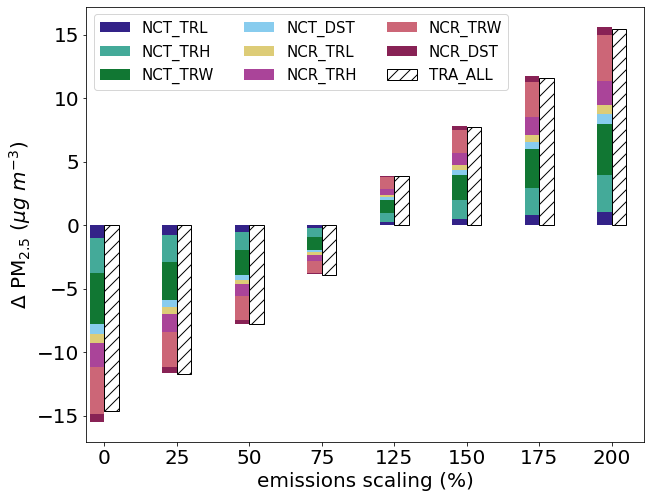

In [10]:
# x values
colors=['#332288','#44AA99','#117733','#88CCEE','#DDCC77','#AA4499','#CC6677','#882255']
labels=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']
ax = d[['NCT_TRL','NCT_TRH','NCT_TRW','NCT_DST','NCR_TRL','NCR_TRH','NCR_TRW','NCR_DST']].plot.bar(stacked=True, position=1,
                            width=.2,rot=0,color=colors)
d[['TRA_ALL']].plot.bar(ax=ax, position=0, width=.2,color='white',hatch='//',edgecolor='black',rot=0)


fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("emissions scaling (%)", fontsize=20)
plt.ylabel("$\Delta$ PM$_{2.5}$ ($\mu g~m^{-3}$)",fontsize=20) 
ax.legend(loc="top right",ncol=3,fontsize=15,
          #bbox_to_anchor=(1.5, 0,0, 0))
         )

In [11]:
#fig.savefig('./fig4d.png', format='png', box_inches="tight",dpi=300)

# PM2.5: hourly values dyno cyle 

In [12]:
pm25h=pd.read_excel('pm25_changes_tra_hour.xlsx').set_index(['sector','hour'])

In [13]:
pm25h

,,base_vals,x0_vals,x0_abs,x0_%,x0.25_vals,x0.25_abs,x0.25_%,x0.5_vals,x0.5_abs,x0.5_%,...,x1.25_%,x1.5_vals,x1.5_abs,x1.5_%,x1.75_vals,x1.75_abs,x1.75_%,x2_vals,x2_abs,x2_%
sector,hour,,,,,,,,,,,,,,,,,,,,,
BASE,0,95.366737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TRL,0,0.000000,94.316544,-1.050192,-1.133422,94.579262,-0.787483,-0.849895,94.841751,-0.524989,-0.566664,...,0.282561,95.890625,0.523889,0.565439,96.152214,0.785485,0.847721,96.412025,1.045286,1.128109
TRH,0,0.000000,92.468895,-2.897849,-3.126084,93.187866,-2.178869,-2.351191,93.910667,-1.456077,-1.571639,...,0.785438,96.819763,1.453020,1.568228,97.544395,2.177658,2.350217,98.272552,2.905811,3.135450
TRW,0,0.000000,91.396675,-3.970075,-4.284453,92.389053,-2.977695,-3.213922,93.378662,-1.988077,-2.145799,...,1.072730,97.350426,1.983699,2.141503,98.342636,2.975900,3.211966,99.333481,3.966736,4.281249
DST,0,0.000000,94.612732,-0.754006,-0.813852,94.800842,-0.565895,-0.610996,94.989922,-0.376818,-0.406803,...,0.200680,95.742859,0.376115,0.406086,95.931564,0.564831,0.609617,96.119087,0.752348,0.811976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCR_TRL,23,0.000000,111.628044,-1.115927,-0.971945,111.909233,-0.834745,-0.726863,112.188644,-0.555337,-0.483508,...,0.239287,113.292992,0.549015,0.477707,113.565086,0.821123,0.714564,113.836349,1.092370,0.950344
NCR_TRH,23,0.000000,109.581779,-3.162190,-2.757372,110.408310,-2.335661,-2.035517,111.209763,-1.534208,-1.336454,...,0.644762,114.218018,1.474044,1.281255,114.939445,2.195474,1.907526,115.656693,2.912722,2.530116
NCR_TRW,23,0.000000,107.093185,-5.650785,-4.986784,108.525955,-4.218013,-3.721910,109.947746,-2.796213,-2.466754,...,1.219527,115.498436,2.754463,2.428138,116.855492,4.111515,3.624551,118.202240,5.458257,4.810955


In [14]:
t='_abs'
d = pm25h.filter(regex=t).T

In [15]:
pm25_abs=pm25h.filter(regex='abs$', axis=1)

In [16]:
pm25_abs=pm25_abs.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in pm25h.columns if (s.startswith('x'))})

In [17]:
pm25_abs=pm25_abs.reset_index().set_index('sector').rename({'TRL':'NCT_TRL','TRH':'NCT_TRH','TRW':'NCT_TRW','DST':'NCT_DST'},axis=0).reset_index()

In [18]:
pm25_abs

,sector,hour,0,25,50,75,125,150,175,200
0,BASE,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NCT_TRL,0,-1.050192,-0.787483,-0.524989,-0.262563,0.261649,0.523889,0.785485,1.045286
2,NCT_TRH,0,-2.897849,-2.178869,-1.456077,-0.729182,0.727627,1.453020,2.177658,2.905811
3,NCT_TRW,0,-3.970075,-2.977695,-1.988077,-0.994959,0.993588,1.983699,2.975900,3.966736
4,NCT_DST,0,-0.754006,-0.565895,-0.376818,-0.189449,0.185897,0.376115,0.564831,0.752348
...,...,...,...,...,...,...,...,...,...,...
235,NCR_TRL,23,-1.115927,-0.834745,-0.555337,-0.277107,0.274975,0.549015,0.821123,1.092370
236,NCR_TRH,23,-3.162190,-2.335661,-1.534208,-0.758682,0.741564,1.474044,2.195474,2.912722
237,NCR_TRW,23,-5.650785,-4.218013,-2.796213,-1.393307,1.383240,2.754463,4.111515,5.458257
238,NCR_DST,23,-0.922022,-0.691944,-0.460707,-0.229891,0.230814,0.461532,0.691220,0.922632


In [19]:
pm25_abs=pm25_abs.melt(id_vars=["sector",'hour'], 
        var_name="scale_factor", 
        value_name="value")

In [20]:
pm25_abs.scale_factor=pm25_abs.scale_factor.astype(float)

In [21]:
scale=pm25_abs.scale_factor.unique()  

In [22]:
hours=pm25_abs.hour.unique()

In [23]:
pm25_abs

,sector,hour,scale_factor,value
0,BASE,0,0.0,0.000000
1,NCT_TRL,0,0.0,-1.050192
2,NCT_TRH,0,0.0,-2.897849
3,NCT_TRW,0,0.0,-3.970075
4,NCT_DST,0,0.0,-0.754006
...,...,...,...,...
1915,NCR_TRL,23,200.0,1.092370
1916,NCR_TRH,23,200.0,2.912722
1917,NCR_TRW,23,200.0,5.458257
1918,NCR_DST,23,200.0,0.922632


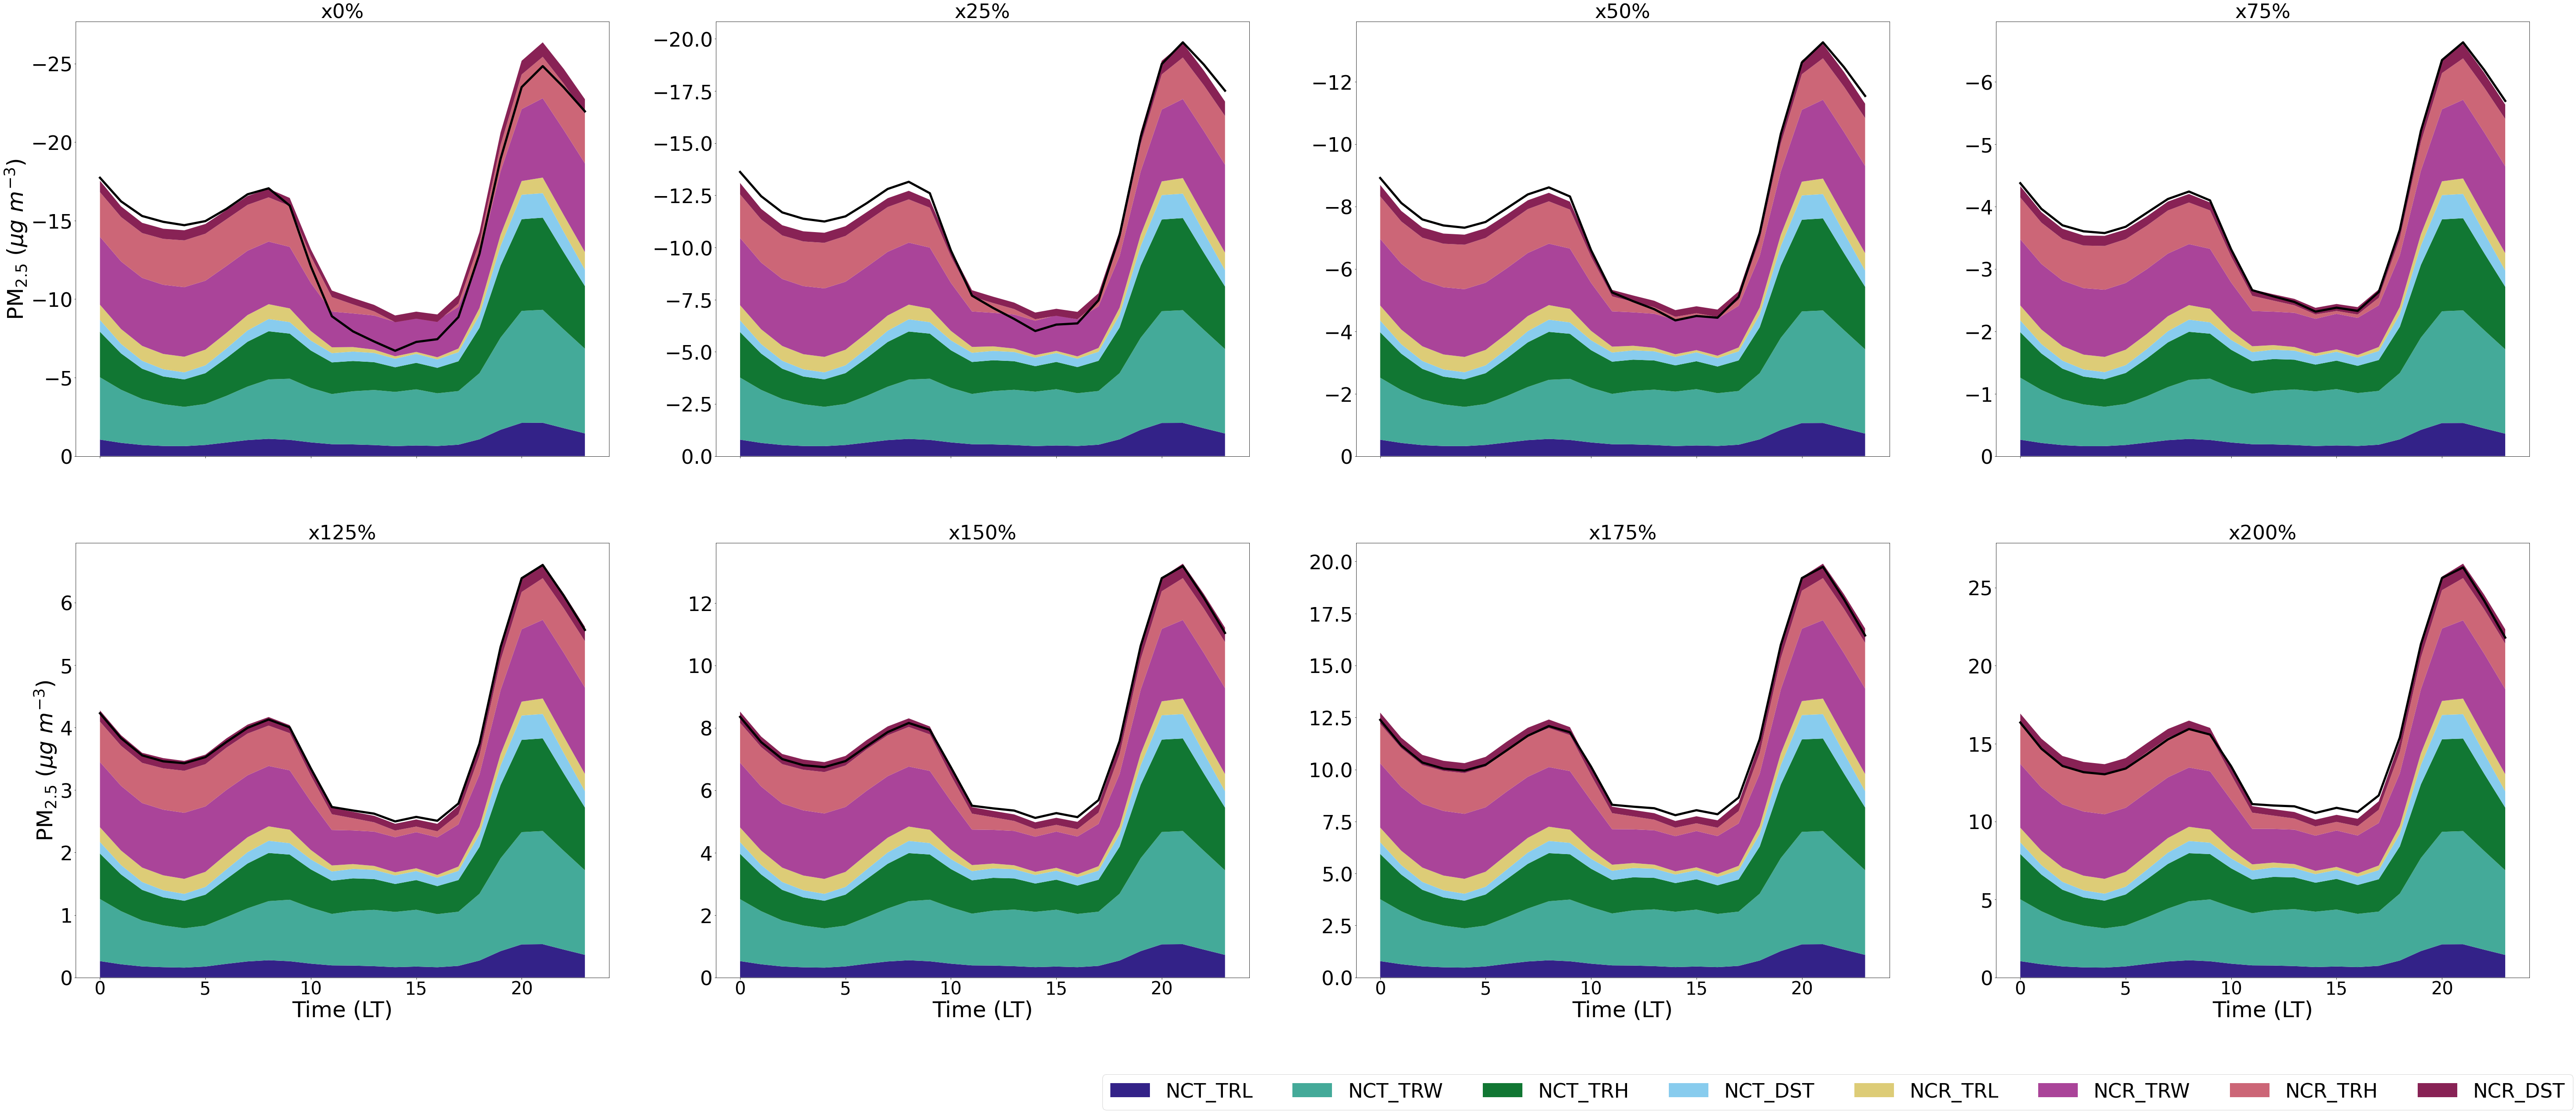

In [24]:
colors=['#332288','#44AA99','#117733','#88CCEE','#DDCC77','#AA4499','#CC6677','#882255']
sec=['NCT_TRL','NCT_TRW','NCT_TRH','NCT_DST','NCR_TRL','NCR_TRW','NCR_TRH','NCR_DST']

fig, axes = plt.subplots(2,4,figsize=(100,40))

for ax,sca in zip(fig.axes,scale):
    t = pm25_abs[(pm25_abs['scale_factor']==sca)].sort_values(by='hour')
    data=[]
    for k,i in zip(sec,colors):
        data.append(t[t['sector']==k]['value'])

    ax.stackplot(hours,data,baseline='zero',labels=sec, colors=colors)

    ax.tick_params(axis='y', which='major', labelsize=45)
    
    ax.plot(hours,t[t['sector']=='TRA_ALL']['value'], color='black', linewidth=5)
    
     
    ax.set_title('x'+str(int(sca))+'%', fontsize=45)
    
for i,ax in zip([0,1,2,3],fig.axes):
    ax.invert_yaxis()

for i,ax in zip([0,1,2,3,4,5,6,7],fig.axes):
    if i in [4,5,6,7]: 
        ax.set_xlabel('Time (LT)', fontsize=50)
        ax.tick_params(axis='x', which='major', labelsize=40)
    else:
        ax.set_xticklabels([])
        
    if i in [0,4]: 
          ax.set_ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)', fontsize=50)
        

plt.legend( bbox_to_anchor=(1.1,-0.2),fontsize=45,ncol=8, loc='bottom left')

In [25]:
#fig.savefig('./figS8.pdf', format='pdf', box_inches="tight",dpi=300)